# Kent State LGBTQ+ Center: Recommendations for Migrating Website Content

## Serena Gestring - 5/6/25

### Introduction

Due to the passing of Senate Bill 1, the Kent State LGBTQ+ Center will be closing during the summer of 2025, and so it is likely that the [LGBTQ+ Center website](www.kent.edu/lgbtq) will also be shutting down soon. However, the LGBTQ+ Center believes there is important content on our website that should remain accessible to Kent State students, faculty/staff, and community members by being saved and migrated to a new website within the Division of Student Life. And so the big question is: “What content within the Kent State LGBTQ+ Center’s website is most utilized by users and is therefore most important for preservation and migration?” I decided to use my final project as an opportunity to answer this driving question.

The first part of this project was to acquire the necessary data. I was able to acquire five different csv files with different web analytics data for the Kent State LGBTQ+ Center website. Four of these files were downloaded directly from the university's Google Analytics account, and the fifth file was sent to me by the Executive Director of Digital Communications within University Communications & Marketing Operations (I think because that data is housed in a system that I cannot be given access to like I was with Google Analytics). The Executive Director also gave me specific instructions on how to correctly download the data I needed for my center's website.

The data contained within each of the five data files were collected over the course of one year, specifically between March 9, 2024 and March 9, 2025. This is because the Executive Director who sent me the non-Google Analytics file input those dates into the external system for data retrieval. I did not ask for those particular dates, but they are very close to being within the past year (the day I received the data was March 18, 2025), so I decided not to ask for different dates. Because of this, when I went to download the Google Analytics data I set the date range in that system to March 9, 2024 through March 9, 2025 so that all of my data covers the same year-long timeframe. 

A more thorough discussion of my data sources and data quality is provided in the "Milestone 1" section of the README.md file in my final project repository.

### Step 1: Import Pandas and Data Visualization Modules

To begin my data analysis process, I imported the pandas module, as well as matplotlib and seaborn so I can quickly start experimenting with different data visualizations.

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

### Step 2: Explore Data Files and Determine which Ones to Utilize

Next I need to explore each data file to see what type of information it is giving me and if that data is even useful for answering my driving question. If the data file does not contain relevant data, then there is no reason to continue using it throughout this project.

#### Device Category

The first data file has to do with the variety of devices that were used to access the LGBTQ+ Center website during the 12 month time frame. I don't need to use df.head() for this file because there are only four total rows included, meaning that there were only four different types of devices used. Also, I was fortunate that this data is already tidy; each row/observation is a type of device and each column/variable is a measureable aspect of that device type's usage.  

In [2]:
device = pd.read_csv('device_category.csv')
device

,Device category,Sessions,Engaged sessions,Engagement rate
0,mobile,28084,17311,0.616401
1,desktop,23108,15743,0.681279
2,tablet,734,447,0.608992
3,smart tv,2,1,0.500000


Again, since I am not familiar with Google Analytics, I had to do some research in order to better understand this data. According to the [Analytics Help website](https://support.google.com/analytics/answer/12195621?hl=en) (by Google), a Session just means "a period during which a user is engaged with your website or app." However, an Engaged Session is a session that meets at least one of the following criteria: "lasts longer than 10 seconds; has a key event; has 2 or more screen or page views." Therefore, the Engagement Rate is "the percentage of engaged sessions on your website or mobile app." So a higher percentage means more sessions of meaningful engagement and a lower percentage means less sessions of meaningful engagement. I higher engagement rate means more people are actively engaging in our content in a meaningful way, rather than passive engagement.

While this data would be useful for understanding our user behavior in general, such as what types of devices they tend to be more engaged with, that is outside the scope of my driving question for this project. Therefore, because this data does not help me identify specific content users have engaged in, it does not make sense for me to further pursue this data in my final project.

#### Traffic Acquisition

My next data file has to do with traffic acquisition, which is basically how users find and access our center's website (e.g., a search engine, a link on another website, an email campaign or signature, directly typing in the URL, etc.). Similar to the first data file, this includes Sessions, Engaged Sessions, and Engagement Rate as variables, and that data looks tidy. However, the first column "Session source / medium" confuses me. It looks like those should be two separate variables to me; I wonder if there is a specific reason Google Analytics put them together. Ultimately it doesn't matter for this project because I will not be moving forward with this data file. Since the goal of traffic acquisition is to determine where your website's users came from before visiting your site, which could help with things like marketing, it does not provide any insight into *where* on our website our users have visited, just that they have made it to our website from different places. Since this data is not useful for my driving question, I will not be pursuing it any further for this project. 

In [3]:
traffic = pd.read_csv('traffic_acquisition.csv')
traffic.head()

,Session source / medium,Sessions,Engaged sessions,Engagement rate
0,google / organic,42038,28279,0.672701
1,(direct) / (none),5484,2491,0.454230
2,bing / organic,941,737,0.783209
3,slate / email,454,317,0.698238
4,login.microsoftonline.com / referral,366,326,0.890710


#### Scroll Depth

My next data file has to do with scroll depth, which measures how far a user has scrolled down a webpage (e.g. 50% down a page, 75% down a page, or 100% down the page). This DataFrame also seems to be already tidy; each row/observation is a unique URL, and the columns represent different variables associated with each URL. 

What's interesting about this DataFrame is that it includes a "Pageviews" metric rather than a "Sessions" metric. Recall that a Session means "a period during which a user is engaged with your website or app." According to the [Analytics Help website](https://support.google.com/analytics/answer/1257084?hl=en#zippy=%2Cin-this-article), a pageview is "a view of a page on your site that is being tracked by the Analytics tracking code." I  believe this means that a user could view an individual webpage multiple times during one session, so it makes sense that Pageviews and Sessions may be different for the same webpage/URL (as seen in the next data file, Sessions and Engagement). 

In [4]:
scroll = pd.read_csv('scroll_depth.csv')
scroll.head()

,Segment,Pageviews,50 Percent,75 Percent,100 Percent
0,/lgbtq/common-ally-questions,14250,3726,2172,243
1,/lgbtq/symbols-ace-spectrum,8464,5899,3165,281
2,/lgbtq/pros-and-cons-being-ally,5281,3240,2116,281
3,/lgbtq,4625,2303,1891,693
4,/lgbtq/frequently-asked-questions-faq,2977,1161,786,131


I think that analyzing the URLs (the Segment column) with the highest pageviews overall and highest pagesviews with 100% scroll depth would be a good indicator of what webpages are most valuable to our website's users. Therefore, I will move forward with utilizing this data for the remainder of my project.

#### Sessions and Engagement

This next data file also contains unique URLs as the observational unit but this time the variables relate to sessions and engagement, similar to the first data file. Right away I am definitely interested in this particular data file because it literally has to do with how users are engaging on each page of our website. 

This data file also includes an "Average session duration" variable, which I believe is an average length of time for each session that involved the unique URL. I don't think this variable would be particularly helpful because having a long average session time does not tell me if the users were actually engaged with the content in a meaningful way during that time. A lot of people will visit a website and then become distracted, especially if they have multiple tabs open, so I don't think this metric will really help me figure out what URLs are most valuable to my users the way I suspect the other metrics can. I think looking at the "Engaged sessions" and "Engagement rate" metrics will be the most useful for my driving question and I will move forward with utilizing this data for the remainder of my project.

In [5]:
se = pd.read_csv('sessions_and_engagement.csv')
se.head()

,Page path and screen class,Sessions,Engaged sessions,Engagement rate,Average session duration
0,/lgbtq/common-ally-questions,14036,7999,0.569892,127.438253
1,/lgbtq/symbols-ace-spectrum,8480,5585,0.658608,62.766498
2,/lgbtq/pros-and-cons-being-ally,5093,3281,0.644218,138.905469
3,/lgbtq,4441,3687,0.830218,151.891271
4,/lgbtq/terminology-list,3359,2422,0.721048,104.620323


#### Menu Link Usage

The fifth and final data file I have involves menu link usage, which has to do with how the menu items/links in our website's navigation menus (header and footer) were used (e.g., how many times each link was clicked). This is the data file the Executive Director of Digital Communications sent to me directly from a site external from Google Analytics. Fortunately, this DataFrame also already appears tidy; each row/observation is a different link in one of our navigation menus (representated as an event), and the variables are different aspects/metrics of each link. 

In [6]:
menu = pd.read_csv('menu_link_usage.csv')
menu.head()

,Event name,Event Description,Click Text,Event count
0,navigation,Megamenu Links,Center Staff,225
1,navigation,Megamenu Links,About Us,206
2,navigation,Megamenu Links,Events and Programs,150
3,navigation,Megamenu Links,Student Resources,94
4,navigation,Megamenu Links,Contact Us,75


However, I do not believe this data file would be the most relevant for my driving question becuase it just shows how many times a link within the navigation menu(s) has been clicked. However, users can view different pages of our website without using the navigation menu, such as googling a specific question and clicking on a result that takes them directly to the page of interest, without ever using the website's navigation. 

Additionally, not every page of our website has a link included in our main navigation menus (clearly, considering this data file only has 30 rows of observations). Therefore, while this tells us how our site's navigation was used, that does not provide the entire picture of content utilizaiton, unlike the scroll depth and sessions/engagement data files that provide specific URLs, and so I will not be pursuing this data file for the remainder of my project.

### Step 3: Explore Potential Data Visualizations to Find the Story

Now that I have identified the two data files that I will be using for this project, I can start exploring different data visualizations and finding what story I want to tell with them. First I explored the scroll depth DataFrame.

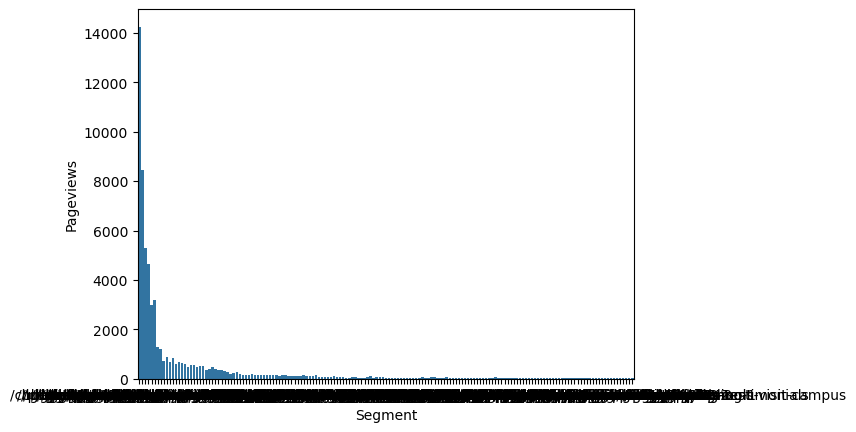

In [7]:
sns.barplot(scroll, x = 'Segment', y = 'Pageviews')
plt.show()

Obviously the graph above is bad and ugly. 163 is way too many rows to plot on one barplot, but it is clear that most of these URLS do not have very many pageviews. I experimented with cutting off rows at different quantities (i.e., removing all rows with less than 2,000 pageviews) and I eventually settled on including only URLs with pageviews above 600.

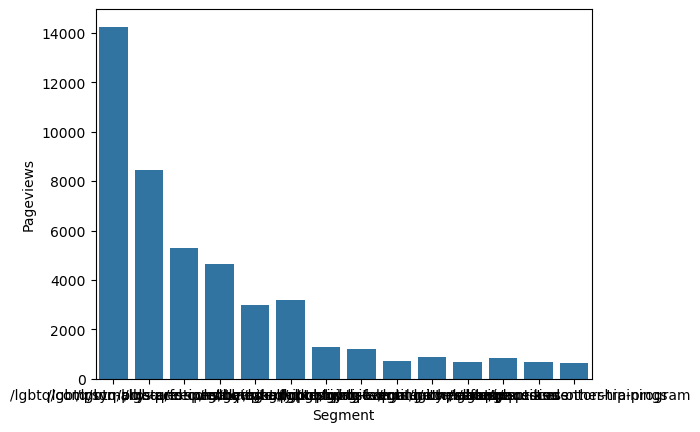

In [8]:
sns.barplot(scroll[scroll['Pageviews'] > 600], x = 'Segment', y = 'Pageviews')
plt.show()

And this gives me 14 URLs. I definitely would not want any more rows than this, especially since it is looks like around 600 is where pageviews start to plateau, so anything under 600 pageviews is not being utilized as much and so is not really worth my consideration.

But do I want to consider the number of pageviews alone? Should I instead consider the URLs by how many of their pageviews had 100% scroll depth (meaning those are the number of pageviews where users scrolled through the entire page rather than only part of the page)? I decided to look at the 100 Percent scroll depth variable.

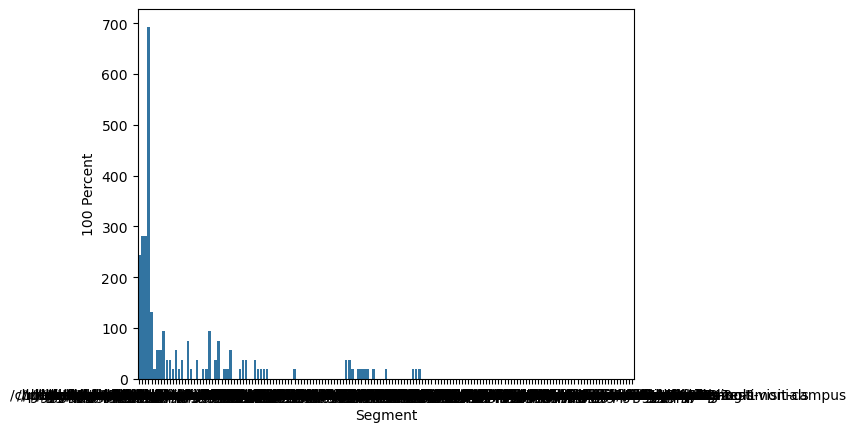

In [9]:
sns.barplot(scroll, x = 'Segment', y = '100 Percent')
plt.show()

Once again I played around with where to draw the line for quantity of pageviews, and I landed on all URLs above 50 pagesviews at 100% scroll depth.

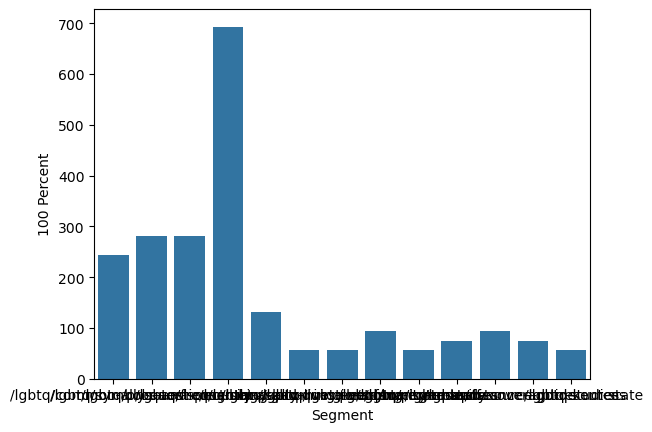

In [10]:
sns.barplot(scroll[scroll['100 Percent'] > 50], x = 'Segment', y = '100 Percent')
plt.show()

This gives me 13 URLs. I wonder how many of those URLs match the URLs from the initial pageviews barplot.

In [11]:
filtered_pageviews = scroll[scroll['Pageviews'] > 600]
filtered_pageviews

,Segment,Pageviews,50 Percent,75 Percent,100 Percent
0,/lgbtq/common-ally-questions,14250,3726,2172,243
1,/lgbtq/symbols-ace-spectrum,8464,5899,3165,281
2,/lgbtq/pros-and-cons-being-ally,5281,3240,2116,281
3,/lgbtq,4625,2303,1891,693
4,/lgbtq/frequently-asked-questions-faq,2977,1161,786,131
5,/lgbtq/terminology-list,3202,487,300,19
6,/lgbtq/upcoming-events,1292,974,637,56
7,/housing/lgbtq-living-learning-community,1198,992,412,56
8,/lgbtq/lgbtq-community-resources,712,599,318,94
9,/lgbtq/ohio-legal-name-change-process,880,412,281,37


In [12]:
filtered_percent = scroll[scroll['100 Percent'] > 50]
filtered_percent

,Segment,Pageviews,50 Percent,75 Percent,100 Percent
0,/lgbtq/common-ally-questions,14250,3726,2172,243
1,/lgbtq/symbols-ace-spectrum,8464,5899,3165,281
2,/lgbtq/pros-and-cons-being-ally,5281,3240,2116,281
3,/lgbtq,4625,2303,1891,693
4,/lgbtq/frequently-asked-questions-faq,2977,1161,786,131
6,/lgbtq/upcoming-events,1292,974,637,56
7,/housing/lgbtq-living-learning-community,1198,992,412,56
8,/lgbtq/lgbtq-community-resources,712,599,318,94
12,/lgbtq/center-staff,580,449,356,56
16,/lgbtq/transgender-resource-guide,487,449,300,75


Well, rows 0-4 and 6-8 appear in both lists, so that gives me 8 URLs that each have some of the most pageviews overall and the most pageviews that had 100% scroll depth. Perhaps those are potential contenders for those pages' contents being preserved. Additionally, as I am deciding which webpages I should recommend or not for migration, I cannot only look at the numbers themselves. I have to also understand what the content is of an individual page in order to determine if it is something that should be preserved in the context of the larger situation. For example, it does not make sense to save and migrate the Upcoming Events page content given the context of our center being closed and there no longer being any upcoming events.

Before I move forward with the scroll depth visualizations, I need to examine each filtered list to determine which webpages even make sense to recommend. If I end up not having very many valid/logical URLs, then I need to expand my filtering of the data to include more data points; but if I have enough, then I will move forward with the filtered data I have already started creating visualizations for. 

#### The filtered_pageviews DataFrame contains the following webpages:

0 - [Common Ally Questions](https://www.kent.edu/lgbtq/common-ally-questions) - This is a webpage within the LGBTQ+ Center's website and because of its informational content is a valid contender for preservation/migration. 

1 - [Symbols of the Ace Spectrum](https://www.kent.edu/lgbtq/symbols-ace-spectrum) (which is part of an accordian menu on the ["What is Asexuality?" Resource Guide](https://www.kent.edu/lgbtq/what-asexuality-resource-guide)) - This is one of our webpages and because of its informational content is a valid contender as well.

2 - [Pros and Cons of Being an Ally](https://www.kent.edu/lgbtq/pros-and-cons-being-ally) - This is one of our webpages and is a valid contender. 

3 - [LGBTQ+ Center Homepage](https://www.kent.edu/lgbtq) - The thing about our homepage is that the content gets updated throughout the semester (different upcoming events we want to highlight), though the static content includes our center's mission statement, a link to donate to our LGBTQ+ Emergency Fund, and a couple embdedded informational YouTube videos. Again, considering the context of why I am doing this project, when our center closes there will no longer be a mission statement, my understanding is we may not be able to offer the LGBTQ+ Emergency Fund, and I don't know what would happen to the YouTube videos since they would still be on YouTube (they are both published on the general Kent State YouTube account, not the LGBTQ+ Center's YouTube account, so I imagine they would still be accessible from YouTube unless it was decided to take them down from that platform as well). So I do not consider this URL to be a valid contender since it would not make sense to migrate its content somewhere else.

4 - [Frequently Asked Questions](https://www.kent.edu/lgbtq/frequently-asked-questions-faq) - This is one of our webpages and because of its informational content this is a valid contender. 

5 - [Terminology List](https://www.kent.edu/lgbtq/terminology-list) - This is one of our webpages and because of its informational content this is a valid contender. 

6 - [Upcoming Events](https://www.kent.edu/lgbtq/upcoming-events) - This is one of our webpages, but as I explained, when our center closes there will be no more upcoming events so it does not make sense to migrate this content somewhere else, and so this URL is not a contender. 

7 - [LGBTQ+ Living Learning Community](https://www.kent.edu/housing/lgbtq-living-learning-community) - This is not one of our center's webpages, this is from University Housing's website, so this isn't a contender. Also we're pretty sure the LGBTQ+ LLC isn't going to be able to exist anymore either, so it wouldn't make sense to save the content anyway. 

8 - [LGBTQ+ Community Resources](https://www.kent.edu/lgbtq/lgbtq-community-resources) - This is one of our webpages and features a dropdown menu of different LGBTQ+ related community resources. I think this is a valid contender but my concern with this one is that it has to be kept up to date or else it isn't useful. Maybe if I choose to recommend this content I should add that as a disclaimer. 

9 - [Ohio Legal Name Change Process](https://www.kent.edu/lgbtq/ohio-legal-name-change-process) - This is one of our webpages and I think this is an important resource because I know in person we get quite a few guests coming into our center to ask about the legal name change process, so this is definitely a contender. 

10 - [Other Ace Identities](https://www.kent.edu/lgbtq/other-ace-identities) - This is one of our webpages, and it is actually also one of the pages within the accordian on the ["What is Asexuality?" Resource Guide](https://www.kent.edu/lgbtq/what-asexuality-resource-guide), which to be clear is basically our Asexuality Brochure content put on our website, so yes this is a valid contender, but maybe it would make sense to recommend all of this content to be preserved/migrated together since it is all related? I don't think it would make sense to recommend only some information/resources on asexuality and not all of it.

11 - [Trans @ KSU](https://www.kent.edu/lgbtq/trans-ksu) - This is one of our webpages, and it contains a bunch of resources, on and off campus, for the transgender community, and the webpage has several of its own subpages sectioning the content into subcategories. This page basically acts as a landing page and from there folks find whatever specific content they are looking for. While many of these subpages themselves obviously don't have as many pageviews (since the only one included in the filtered DataFrame is the Ohio Legal Name Change Process), because the transgender community in particular is facing growing challenges at this time, I think all of this content should be saved and migrated so it continues to be accessible, especially if our center does not exist as a resource for students to go to instead. I know I have personally created some of these subpages because we had students come in and ask us about those topics because they felt comfortable doing so because we are the LGBTQ+ Center. Without us, I am worried trans students will still have those same questions and concerns but not know where to get help or be comfortable asking for it, which is why I think all of this content should be saved. With all these considerations in mind, I don't think that is an unreasonable recommendation (whether or not its plausible is out of my hands). 

13 - [Safe Space and Other Trainings](https://www.kent.edu/lgbtq/safe-space-and-other-trainings) - This is one of our webpages, and it talks about the different trainings our center offers. Without a center, there is not going to be any more of these trainings (and with the new law I don't think we could provide them anyway), so this URL is not a contender for recommendation. 

14 - [Quest Mentorship Program](https://www.kent.edu/lgbtq/quest-mentorship-program) - This is one of our webpages, and it provides information related to our center's mentorship program. Again, without a center, this program will go away so this URL is not a contender. 

So out of these 14 URLs, there are 9 URLs that are valid contenders for being recommended for preservation/migration, which I still think is a good amount, especially because some of them contain a lot of content. 

#### The filtered_percent DataFrame contains the following webpages:

0 - 4 - Same as filtered_pageviews DataFrame. 0, 1, 2, and 4 are valid contenders.

6 - 8 - Same as filtered_pageviews DataFrame. 8 is a valid contender. 

12 - [Center Staff](https://www.kent.edu/lgbtq/center-staff) - This is one of our webpages and contains information about our center's staff (Director, Assistant Director, Graduate Assistant, and links to a subpage of our student interns). Of course, without a center, there is not going to be any staff, so this URL is not a contender. 

16 - [Transgender Resource Guide](https://www.kent.edu/lgbtq/transgender-resource-guide) - This is one of our webpages, and it is actually one of the subpages of the Trans @ KSU webpage. This Resource Guide is basically the web version of our printed transgender resource brochure that we keep in our center. I think this would be a valid contender on its own, but I would be recommending it along with the rest of Trans @ KSU content anyway. 

23 - [LGBTQ Assistance and Resources](https://www.kent.edu/lgbtq/lgbtq-assistance-and-resources) - This is basically the Resources landing page which then contains many subpages of different types of resources. The webpage itself really doesn't have any important content, it really is just a landing page and a place to house all of our resources, so because of that I don't think this is a valid contender.

26 - [Discover LGBTQ+ Kent State](https://www.kent.edu/lgbtq/discover-lgbtq-kent-state) - This is our center's "About Us" but with a different title and the page itself literally only has our mission statement and a link to our Contact Us page, all of which will be irrelevant once the center closes so this URL is not a valid contender.

30 - [LGBTQ Studies](https://www.kent.edu/lgbtq-studies) - This is not our webapge, this is the homepage for the LGBTQ+ Studies program (housed in the School of MSSH), so this URL is not a valid contender. 

From this DataFrame there are only 6 URLs that would make sense to recommend, and 5 of those were included in the first DataFrame and the 6th is a subpage of a URL that was included in the first DataFrame, so really this filtered_percent DataFrame (which tells me which URLs had the most pageviews with 100 Percent scroll depth) does not actually tell me anything new. Because of this, moving forward the only data from the Scroll Depth data file I am going to use is the filtered_pageviews DataFrame.

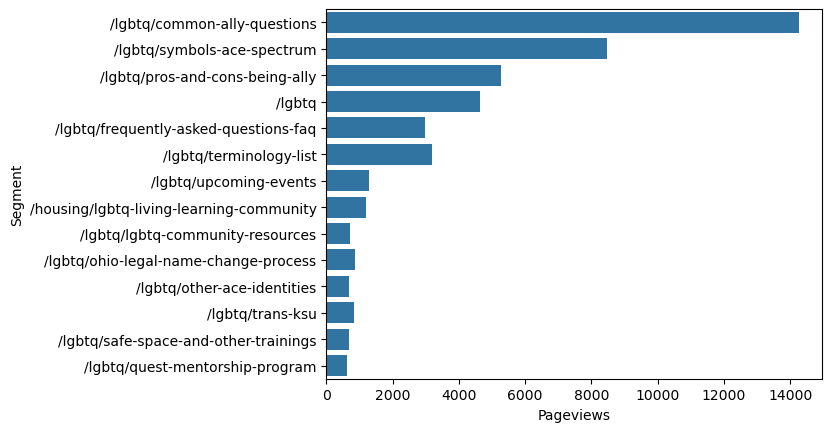

In [13]:
sns.barplot(filtered_pageviews, x = 'Pageviews', y = 'Segment', orient = 'h')
plt.show()

The above barplot is my rough draft of the filtered_pageviews visualization and I have my list of which URLs I want to recommend. Changing the orientation to horizontal makes the URL labels readable. This graph will need improved, but I still need to explore my Sessions & Engagement DataFrame first.

In [14]:
se.shape

(359, 5)

Looking at the shape of this DataFrame, it has 359 rows, which means 359 unique URLs. This is interesting because the scroll depth DataFrame only had 163 rows of unique URLs. I don't know why that would be, but I am going to guess that the URLs with the highest number of engaged sessions are going to be similar to those with the most pageviews. So I am not super worried about it because I am going to guess I would be dropping most if not all of those extra rows anyway, but I am curious why that discrepancy exists.

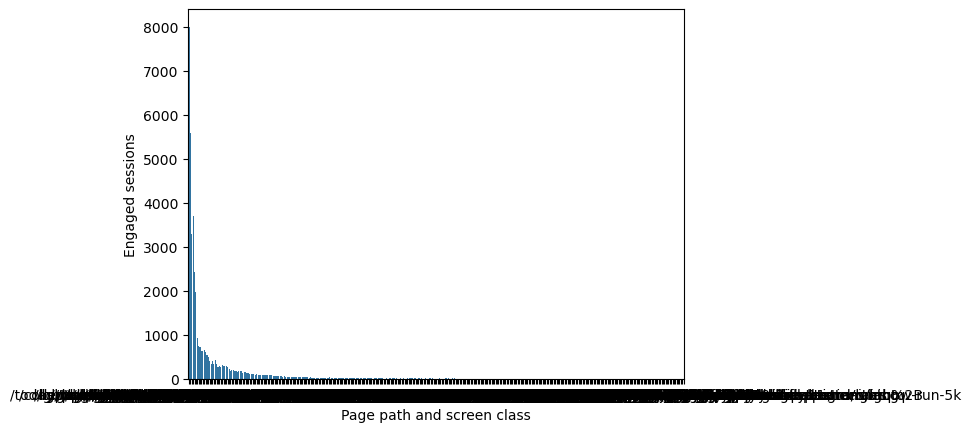

In [15]:
sns.barplot(se, x = 'Page path and screen class', y = 'Engaged sessions')
plt.show()

Here I have the same problem as I did with the pageviews barplot. I explored at what point to cut off the number of engaged sessions, and found that removing everything under 500 engaged sessions worked well.

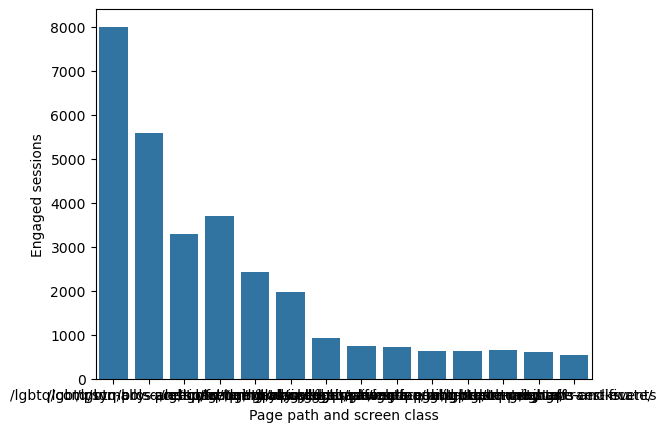

In [16]:
sns.barplot(se[se['Engaged sessions'] > 500], x = 'Page path and screen class', y = 'Engaged sessions')
plt.show()

I get 14 URLs. It looks like around 500 engaged sessions is also where they start to plataeu, so I definitely don't want to include more than this. 

I also want to look at "Engagement rate" because that metric will give me an idea of the percentage of users being engaged versus how many users altogether are visiting each URL. For example, a webapge might have a high number of engaged sessions, but if the engagement rate is low, that means overall the users visiting that page are not meaningfully engaging in that page's content. So I don't want to only consider the number of engaged sessions per URL. 

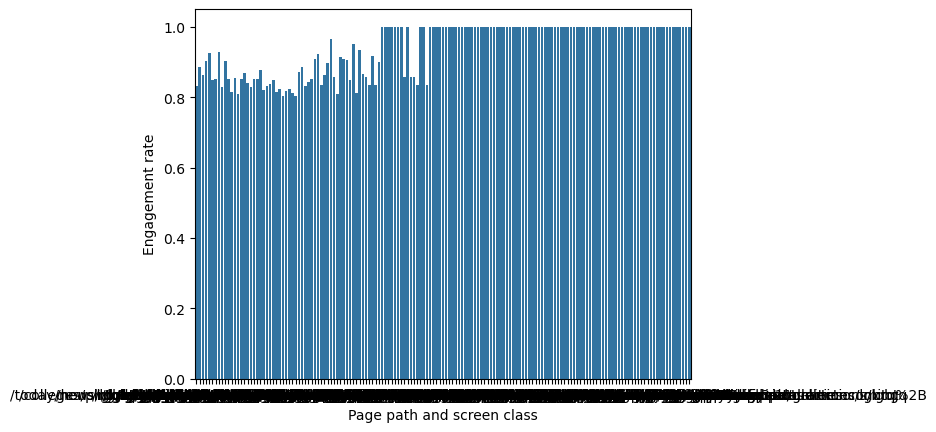

In [17]:
sns.barplot(se[se['Engagement rate'] > 0.8], x = 'Page path and screen class', y = 'Engagement rate')
plt.show()

This was not what I was expecting to see, so I investigated.

In [18]:
enr = se[se['Engagement rate'] > 0.8]
enr.tail()

,Page path and screen class,Sessions,Engaged sessions,Engagement rate,Average session duration
354,/lgbtq/whats-news,1,1,1.0,10.390929
355,/people-and-culture/news/lgbtq-center-celebrat...,1,1,1.0,20.569349
356,/special-collections-and-archives/search-speci...,1,1,1.0,54.535266
357,/special-collections-and-archives/search-speci...,1,1,1.0,85.666002
358,/tag/lgbtq+,1,1,1.0,60.219101


There are some URLs that have literally 1 engaged session and one session, giving them a 1.0 engagement rate. It occurred to me that this might be an issue where URLs with high engagement rates may be due to having such low sessions versus engaged sessions to begin with. Maybe I should try looking at engagement rates for only the 14 URLs that have the highest engaged sessions.  

In [21]:
filtered_se = se[se['Engaged sessions'] > 500]

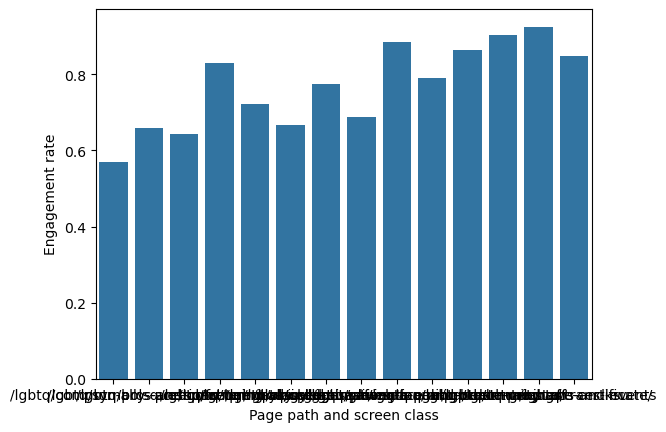

In [22]:
sns.barplot(filtered_se, x = 'Page path and screen class', y = 'Engagement rate')
plt.show()

It looks like all 14 of these URLs have engagement rates above 0.5, so that tells me each of these URLs are engaged with enough to still be potential candidates.

From here I want to examine each URL in the filtered DataFrame to determine how many of these would make sense to actually recommend, like what I did with the scroll depth DataFrames.

In [23]:
filtered_se

,Page path and screen class,Sessions,Engaged sessions,Engagement rate,Average session duration
0,/lgbtq/common-ally-questions,14036,7999,0.569892,127.438253
1,/lgbtq/symbols-ace-spectrum,8480,5585,0.658608,62.766498
2,/lgbtq/pros-and-cons-being-ally,5093,3281,0.644218,138.905469
3,/lgbtq,4441,3687,0.830218,151.891271
4,/lgbtq/terminology-list,3359,2422,0.721048,104.620323
5,/lgbtq/frequently-asked-questions-faq,2949,1965,0.666328,158.740201
6,/lgbtq/upcoming-events,1185,918,0.774684,119.601071
7,/lgbtq/ohio-legal-name-change-process,1089,749,0.687787,139.705500
8,/housing/lgbtq-living-learning-community,814,721,0.885749,103.146535
9,/lgbtq/safe-space-and-other-trainings,789,624,0.790875,167.845683


In [ ]:
filtered_se['Page path and screen class'][10]

The filtered_se DataFrame contains nearly the exact same list of URLs as the filtered_pageviews DataFrame with the exception of a few rows near the end:

10 - I actually couldn't figure out what the full URL for this one was; www.kent.edu/colleges/ph/lgbtq-public-health/graduate/certificate pulls up a 404 error. Regardless, since it starts with "/colleges" this isn't a webapge on our center's website anyway so it is not a valid contender. 

11 - Center Staff - Again, this information does not make sense to save, so it is not a valid contender. 

12 - [LGBTQ Programs and Events](https://www.kent.edu/lgbtq/lgbtq-programs-and-events) - This is basically a landing page that links to our center's main programs and events. Since these programs and events would cease with the closing of our center, there is no reason to migrate this content somewhere else, so this is not a valid contender. 

So the filtered_pageviews DataFrame gave me 9 valid URLs and the filtered_se DataFrame gave me 7 valid URLs that are all also included in the first DataFrame. The remaining 2 URLs in the first DataFrame are the LGBTQ+ Community Resources page and the Other Ace Identities page. However, like I mentioned eariler I think all of the asexual-related content should be recommended together, so I am okay that that particular page does not show up in the second DataFrame. The LGBTQ+ Community Resources page was the one I said I would add a disclaimer to, so I am also okay with that one not being in the second DataFrame. Therefore, I want to use both of these DataFrames for my final data visualizations because it provides additional proof of user engagement for the recommended URLs. 

For the filtered_se DataFrame, I created a new horizontal barplot that shows the engagement rates of the URLs with the highest engaged sessions.

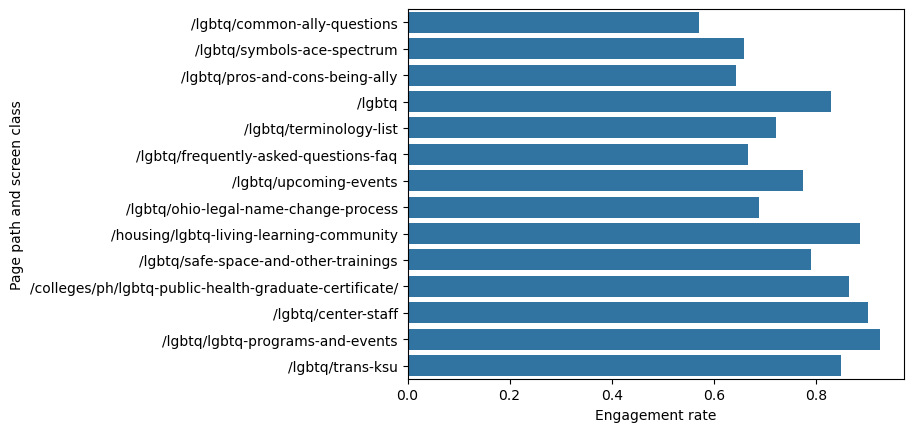

In [24]:
sns.barplot(data = filtered_se, x = 'Engagement rate', y = 'Page path and screen class', orient = 'h')
plt.show()

I think the horizontal barplot is a good visualization for the filtered_pageviews DataFrame since that is just showing the quantity of pageviews over 500, but I wonder if there is a potentially better type of visualization for the filtered_se DataFrame. The above graph is showing the Engagement rates for URLs with the highest Engaged sessions, but from the barplot it is not clear that those URLs have the highest Engaged Sessions unless I were to explicitly state that somewhere. It also might be beneficial to see how the quantity of Engaged sessions compares to the Engagement rate for each URL. Maybe a scatterplot would be better.

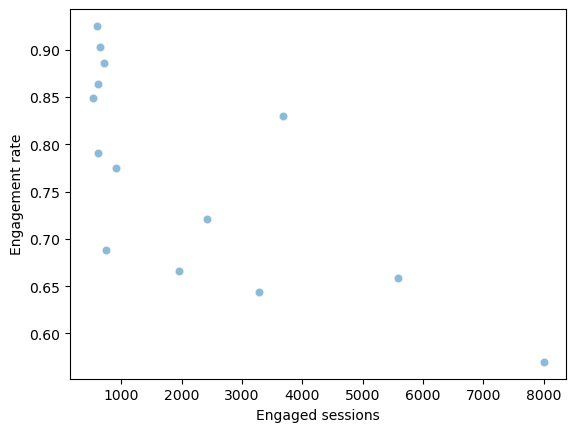

In [25]:
sns.scatterplot(filtered_se, x = 'Engaged sessions', y = 'Engagement rate', alpha = 0.5)
plt.show()

This graph is nice because now I can see the quantities for both total number of Engaged session and the Engagement rate at the same time. I will move forward with this scatterplot for my filtered_se DataFrame visualization.

### Step 4: Refine Data Visualizations

I have draft visualizations for my two DataFrames and I have the story I want to tell (which URLs to recommend). Now I need to refine my visualizations to effectively tell my story. 

First I wanted to change the y-axis labels from the URL segment to the title of the webpage because some of the URLs are very long and might not make sense to folks in my target audience (higher education administration). To do this, I used the .assign() method to create a new DataFrame with a new column added with this data.

In [26]:
title_pv = filtered_pageviews.assign(Title = ['Common Ally Questions', 
                                  'Symbols of the Ace Spectrum', 
                                  'Pros and Cons of Being an Ally', 
                                  'LGBTQ+ Center Homepage', 
                                  'Frequently Asked Questions', 
                                  'Terminology List', 'Upcoming Events', 
                                  'LGBTQ+ Living Learning Community', 
                                  'LGBTQ+ Community Resources', 
                                  'Ohio Legal Name Change Process', 
                                  'Other Ace Identities', 
                                  'Trans @ KSU', 
                                  'Safe Space and Other Trainings', 
                                  'Quest Mentorship Program'])

For my overview figures, I think I just want to show my barplot and scatterplot without any color to give my audience the change to understand the visualizations themselves before adding on the layer of my recommendations. I also added a title to each.

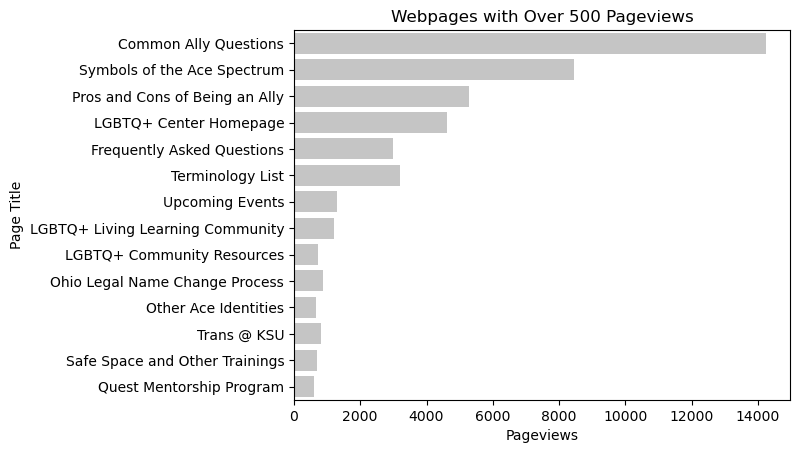

In [27]:
sns.barplot(data = title_pv, x = 'Pageviews', y = 'Title', orient = 'h', color = '#C5C5C5')
plt.ylabel('Page Title')
plt.title('Webpages with Over 500 Pageviews')
plt.show()

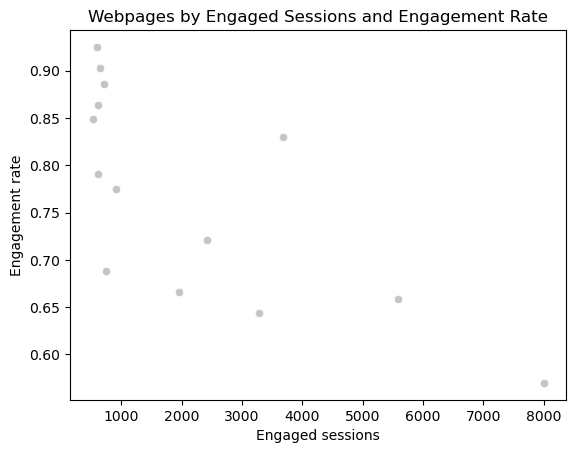

In [28]:
sns.scatterplot(filtered_se, x = 'Engaged sessions', y = 'Engagement rate', color = '#C5C5C5')
plt.title('Webpages by Engaged Sessions and Engagement Rate')
plt.show()

Next I want to color code my graphs, where one color represents the URLs I do not recommend to be migrated and another color represents the URLs I do recommend be migrated.

Similar to what I just did, I am going to use the .assign() method to create a new DataFrame that includes a "Recommend" column where each observation gets a "Yes" or "No" depending on if I want to recommend it or not. Then I can use that column as a hue for the visualizations.

In [29]:
rec_pv = title_pv.assign(Recommend = ['Yes', 'Yes', 'Yes', 'No', 'Yes', 'Yes', 'No', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'No', 'No'])

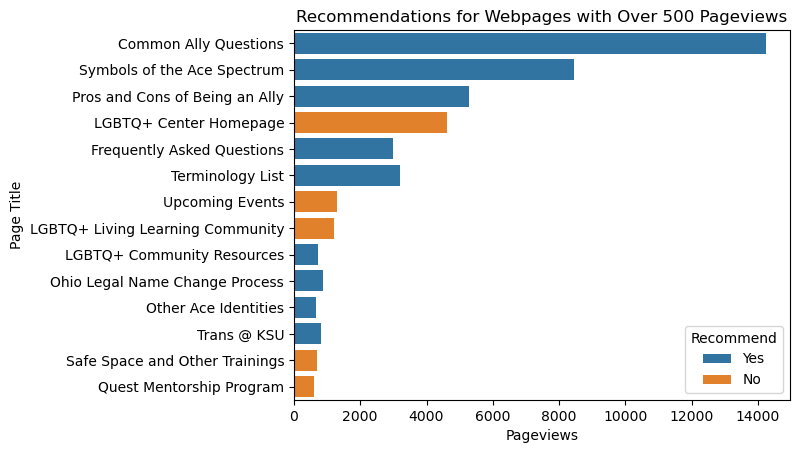

In [30]:
sns.barplot(data = rec_pv, x = 'Pageviews', y = 'Title', orient = 'h', hue = 'Recommend')
plt.ylabel('Page Title')
plt.title('Recommendations for Webpages with Over 500 Pageviews')
plt.show()

Now I want to change the specific colors being used, because right now the blue and orange are just default colors from seaborn. I found a reference for creating my own color palette [here](https://towardsdatascience.com/how-to-use-your-own-color-palettes-with-seaborn-a45bf5175146/). I definitely want to use gray for the non-recommended URLs since those are not important, but what color for the recommended URLs? 

Initially I was thinking lavender because that is a [significant color for the LGBTQ+ community](https://www.cnn.com/style/article/lgbtq-lavender-symbolism-pride/index.html), but I also want to keep in mind accessibility to those with color-vision deficiencies, so lavender and gray might not be a good palette choice. I needed to do some research.

I found this website that allows you to input your own colors and it shows you how those colors look together to people with different color-vision deficiences. I fiddled around with different colors until I found a lavender color and a gray color that I liked but that also seem to contrast with each other enough so that people with color-vision deficiences would still be able to tell them apart. This link will take you to the website with my colors: https://davidmathlogic.com/colorblind/#%23C5C5C5-%23D486FF-%23FFFFFF-%23FFFFFF

Now that I have my specific color palette, I can use those colors in my graph.

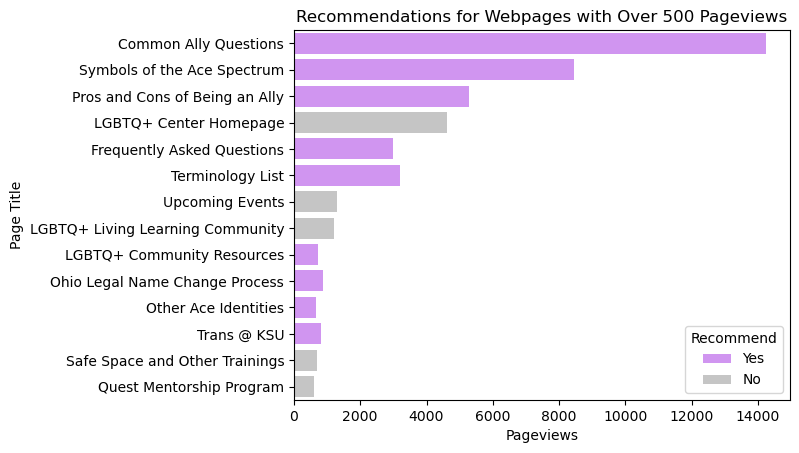

In [31]:
colors = ['#D486FF', '#C5C5C5']
sns.set_palette(sns.color_palette(colors))
sns.barplot(data = rec_pv, x = 'Pageviews', y = 'Title', orient = 'h', hue = 'Recommend')
plt.ylabel('Page Title')
plt.title('Recommendations for Webpages with Over 500 Pageviews')
plt.show()

Now the last change I want to make to this visualization is to put an asterisk by the LGBTQ+ Community Resources URL because that was the one I wanted to add a disclaimer to, which I will explain with words in my final slideshow presentation. 

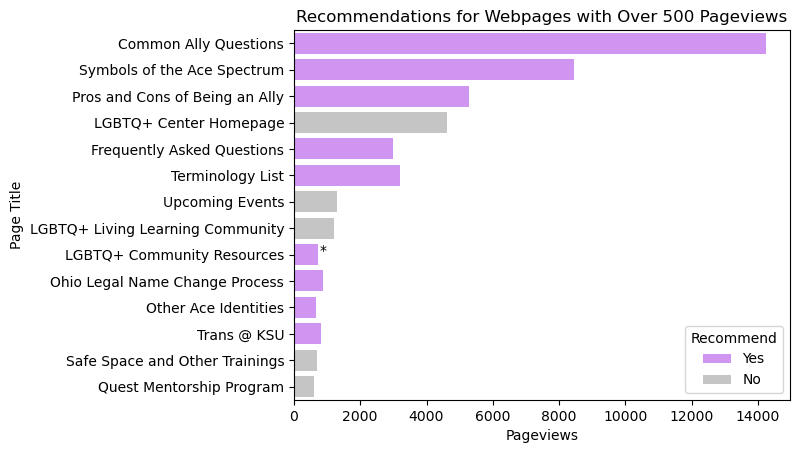

In [32]:
colors = ['#D486FF', '#C5C5C5']
sns.set_palette(sns.color_palette(colors))
sns.barplot(data = rec_pv, x = 'Pageviews', y = 'Title', orient = 'h', hue = 'Recommend')
plt.ylabel('Page Title')
plt.title('Recommendations for Webpages with Over 500 Pageviews')
plt.text(x=780, y="LGBTQ+ Community Resources", s="*", size = 'medium')
plt.show()

This figure is now done and I am very happy with how it turned out.

Now I want to do a similar process of polishing my scatterplot. First I need to create a new column for my recommendation (yes or no) so that I can color-code the points on the scatterplot. I used the .assign() method again.

In [33]:
recs_se = filtered_se.assign(Recommend = ['Yes', 'Yes', 'Yes', 'No', 'Yes', 'Yes', 'No', 'Yes', 'No', 'No', 'No', 'No', 'No', 'Yes'])

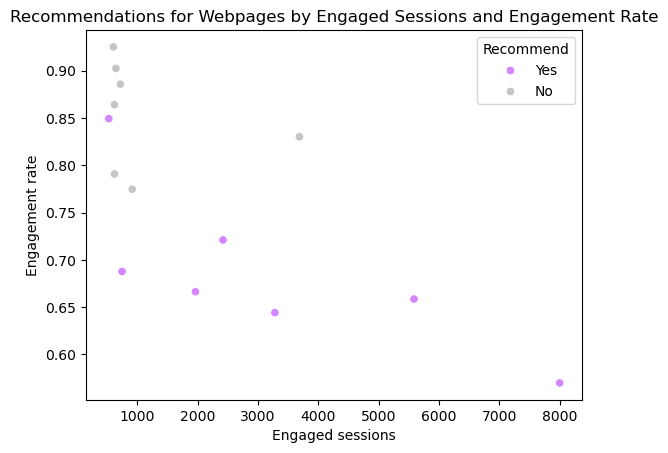

In [34]:
sns.scatterplot(recs_se, x = 'Engaged sessions', y = 'Engagement rate', hue = 'Recommend')
plt.title('Recommendations for Webpages by Engaged Sessions and Engagement Rate')
plt.show()

Now that the data is color-coded, I also want to label the lavender points so it is clear which webpages are being recommended. I found a reference on how to annotate a scatterplot: https://python-graph-gallery.com/46-add-text-annotation-on-scatterplot/

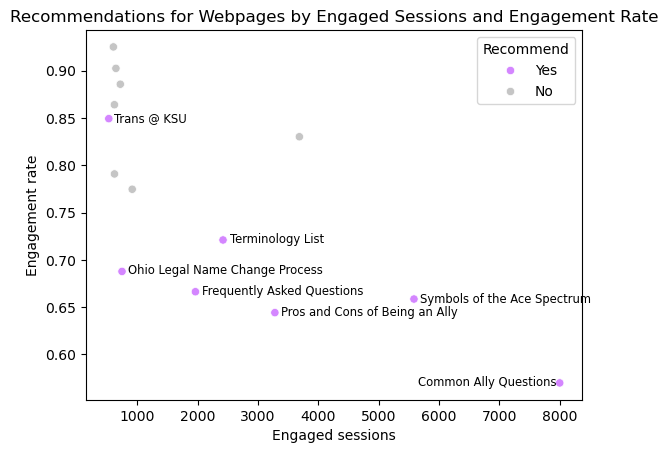

In [35]:
sns.scatterplot(recs_se, x = 'Engaged sessions', y = 'Engagement rate', hue = 'Recommend')
plt.title('Recommendations for Webpages by Engaged Sessions and Engagement Rate')
plt.text(x=620, y=0.846, s="Trans @ KSU", size = 'small')
plt.text(x=850, y=0.685, s="Ohio Legal Name Change Process", size = 'small')
plt.text(x=2070, y=0.663, s="Frequently Asked Questions", size = 'small')
plt.text(x=2530, y=0.718, s="Terminology List", size = 'small')
plt.text(x=3381, y=0.641, s="Pros and Cons of Being an Ally", size = 'small')
plt.text(x=5685, y=0.655, s="Symbols of the Ace Spectrum", size = 'small')
plt.text(x=5659, y=0.567, s="Common Ally Questions", size = 'small')
plt.show()

I like that the points are now labeled but I think the long titles really clutter the graph and distract from the points themselves, which is definitely not the goal of the labels. I am going to try labeling the points with numbers instead and then listing the page titles with their corresponding numbers somewhere else, such as on a slide in my presentation. 

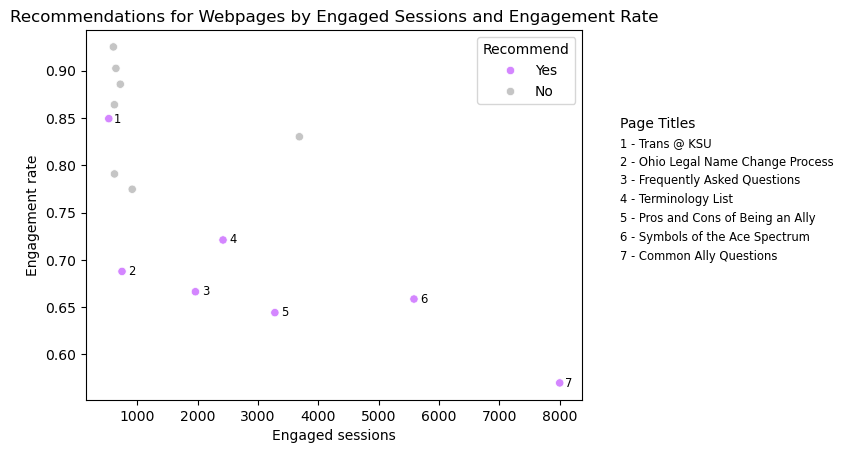

In [36]:
sns.scatterplot(recs_se, x = 'Engaged sessions', y = 'Engagement rate', hue = 'Recommend')
plt.title('Recommendations for Webpages by Engaged Sessions and Engagement Rate')
plt.text(x = 620, y = 0.845, s = '1', size = 'small')
plt.text(x = 850, y = 0.684, s = '2', size = 'small')
plt.text(x = 2070, y = 0.663, s = '3', size = 'small')
plt.text(x = 2530, y = 0.718, s = '4', size = 'small')
plt.text(x = 3381, y = 0.641, s = '5', size = 'small')
plt.text(x = 5685, y = 0.655, s = '6', size = 'small')
plt.text(x = 8089, y = 0.566, s = '7', size = 'small')
plt.text(x = 9000, y = 0.84, s ='Page Titles', size = 'medium')
plt.text(x = 9000, y = 0.82, s = '1 - Trans @ KSU', size = 'small')
plt.text(x = 9000, y = 0.80, s = '2 - Ohio Legal Name Change Process', size = 'small')
plt.text(x = 9000, y = 0.78, s = '3 - Frequently Asked Questions', size = 'small')
plt.text(x = 9000, y = 0.76, s = '4 - Terminology List', size = 'small')
plt.text(x = 9000, y = 0.74, s = '5 - Pros and Cons of Being an Ally', size = 'small')
plt.text(x = 9000, y = 0.72, s = '6 - Symbols of the Ace Spectrum', size = 'small')
plt.text(x = 9000, y = 0.70, s = '7 - Common Ally Questions', size = 'small')
plt.show()

I realized I could do the page titles with their numbers directly in the figure. I think this looks much better. The graph isn't crowded but the points being recommended are still identifiable. This graph is now done and I am happy with how it turned out.

My data visualizations are finalized, but importantly the one thing these do not communicate is *why* I am recommending these specific webpages, which is something I will need to do using words, not with a visualization.

### Step 5: Create Final Deliverable (Slideshow Presentation)

At this point I have my list of webpages/URLs to recommend for migration, my justifications for those recommendations, and two polished data visualizations (four in total counting the two overview figures). Now all of I have left to do is assemble all of my work into a slideshow presentation that will be shown to my audience (my supervisor at the LGBTQ+ Center and other higher education administration folks in the Division of Student Life). 

I have outlined the content and flow of my presentation below:

1. **Introduction and Research Question** - Explain context of my project and state my research/driving question
2. **Definition of Terms** - Provide definitions for specific Google Analytics terms as those are probably unfamiliar to my audience
3. **Methodology** - Briefly explain how I sourced my data, the date range it encompasses, and why I chose to analyze the specific data that I did
4. **Data Visualizations** - Start with my barplot overview figure; then the colored barplot with recommendations for the filter/zoom; then the scatterplot overview figure; end with colored scatterplot with recommendations for filter/zoom. The separate overview and filter/zoom figures are to make sure my audience is not overwhelmed with all of the information at once. 
5. **Recommendations for Preservation/Migration** - Here I will justify why I am recommending each webpage/URL I have chosen, which would be the details on demand portion of my data. If I were creating an interactive visualization, this is information I could include when the viewer hovers over an observation (bar in barplot or point in scatterplot), but because these are static visualizations I need to explain this in words within the slides. 
6. **Conclusion** - Briefly reiterate key points: driving question, the data that helped me answer that question, and why migrating this content is important ("Flashes Take Care of Flashes" angle)
7. **Author Qualifications** - To justify my expertise and validity of my work for this report. If other higher education administration folks view my report they probably won't know who I am, so this slide will explain how I've worked at the LGBTQ+ Center for five years on our website specifically, and that I am a graduate student who took a data visualization course, and that is why I am qualified to do this project and create this report.

This is a link to a pdf file of my final project slideshow presentation: https://drive.google.com/file/d/1Q3uZJlqaFyvXH9rQ1_8K6GEEc9UzaRSM/view?usp=sharing. Once again the file is too large to preview but you can download it. 

A final reflection on this project is located in the README file in my final project GitHub repository. 